In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

<div>
    <font color="green">Общая информация о данных.</font>
</div>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div>
    <font color="green">Понижение регистра в названиях столбцов.</font>
</div>

In [4]:
data.columns = data.columns.str.lower()

<div>
    <font color="green">Удаление строк с пропусками в название игры. Строки без названия игр могут оказаться ошибочными или дубликатами. Их мало, поэтому их удаление не сильно повлияет на результаты исследования.</font>
</div>


In [5]:
data = data.drop(data.loc[data['name'].isna()].index)
data['name'].isna().sum()

0

<div>
    <font color="green">Аббревиатура 'tbd' в столбце оценок пользователей переводится в nan. </font>
</div>

In [6]:
data.loc[data['user_score']=='tbd', 'user_score'] = np.nan

<div>
    <font color="green">
        Замена пропусков в столбце рэйтинга ESRB на значение 'unknown'.
    </font>
</div>

In [7]:
data['rating'] = data['rating'].fillna('unknown')

<div>
    <font color="green">
        Перевод строковых значений в столбце оценок пользователей в числовой тип.</font>
</div>


In [8]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='ignore')

<div>
    <font color="green">Замена пропусков в столбце года релиза на значение 1975. Приведение типа в целочисленный. Пропуски могли быть вызваны не полным сбором информации либо техническими проблемами.</font>
</div>

In [9]:
data['year_of_release'] = data['year_of_release'].fillna(1975)
data['year_of_release'] = data['year_of_release'].astype(int)

<div>
    <font color="green">Удаление строк с одновременными дубликатами в столбцах названия игры и платформы.
    </font>
</div>

In [10]:
data = data.drop_duplicates(subset=['name', 'platform'])

<div>
    <font color="green">Добавление в таблицу нового столбца с общими продажами по всем регионам.</font>
</div>

In [11]:
data['gen_sales'] = data[['na_sales', 'eu_sales', 'jp_sales']].apply(lambda x: sum(x),axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,gen_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,30.38


<div>
    <font color="green">График распределения игр по году релиза.</font>
</div>

<AxesSubplot:xlabel='index', ylabel='year_of_release'>

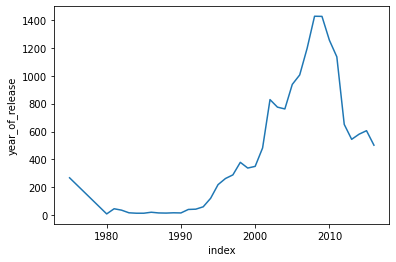

In [12]:
sns.lineplot(x='index', y='year_of_release', data=data['year_of_release'].value_counts().reset_index())

<div>
    Данные скошенны влево. Частота игр до 1990 года релиза хоть и мала, но эти данные могут быть важны для исследования.
</div>

<div>
    <font color="green">Распределения по годам продаж игр по платформам с наибольшими продажами.</font>
</div>

In [13]:
platform_max = data.groupby('platform')['gen_sales'].sum().reset_index().\
sort_values(by='gen_sales', ascending=False).head(9)['platform'].values

Платформа PS2


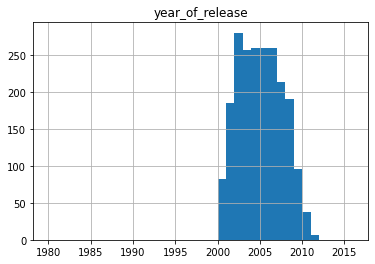

Платформа X360


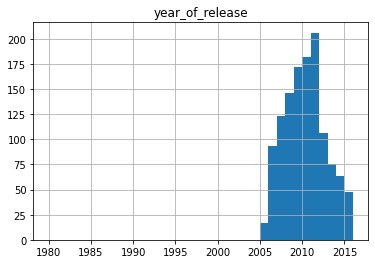

Платформа Wii


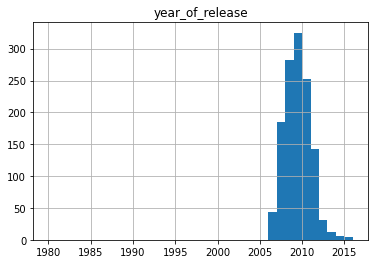

Платформа PS3


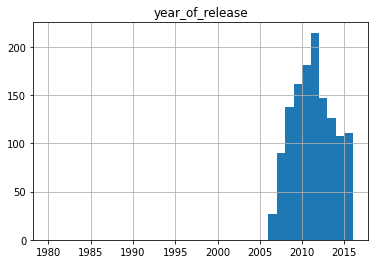

Платформа DS


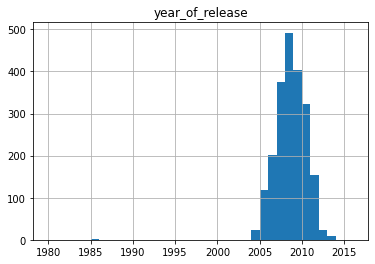

Платформа PS


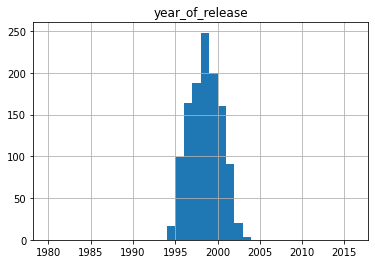

Платформа GBA


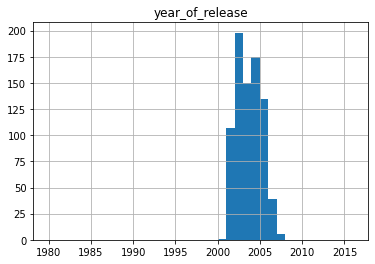

Платформа PS4


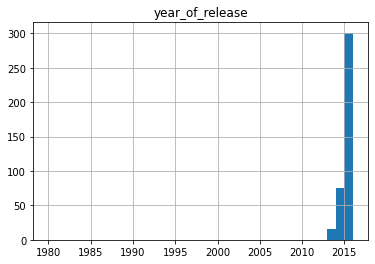

Платформа PSP


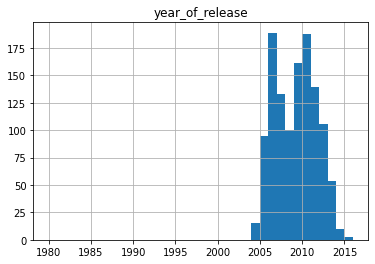

In [14]:
for platform in platform_max:
    print('Платформа', platform)
    data.loc[data['platform']==platform].hist('year_of_release', range=(1980, 2016), bins=36)
    plt.show()

Новые платформы появляются примерно каждые 5 лет. Хотя в 2010 году сильно прибыльных платформ не появилось.Платформы держаться на рынке около 10 лет.Актуальным периодом для исследования для прогноза на 2017 год выбран период с 2012 года.

<div>
    <font color="green">Распределение продаж игр по платформам с наибольшими продажами с 2012 года.</font>
</div>

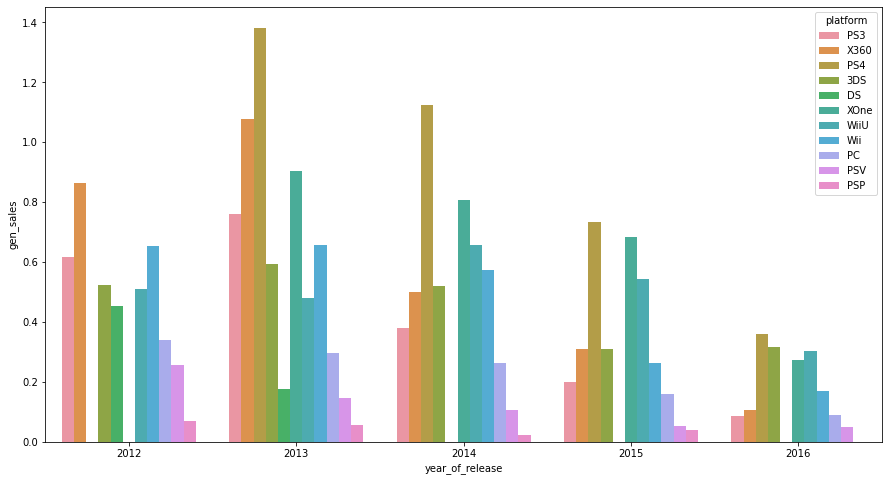

In [15]:
data_current = data.loc[data['year_of_release']>2011]
fig1, ax1 = plt.subplots(figsize=(15, 8))
sns.barplot(x='year_of_release',
            y='gen_sales',
            hue="platform",
            data=data_current,
            ax=ax1,
            ci=None
)
plt.show()

В настоящий период по продажам лидирует PS4. DS полностью ушла с рынка. WiiU показывает некоторую стабильность, хоть и невысокую популярность, как и 3DS. В выделенный период появились PS4, XOne. Потенциально прибыльными можно выбрать PS4, XOne, WiiU, 3DS.

<div>
    <font color="green">График «ящик с усами» по глобальным продажам игр в разбивке по платформам.</font>
</div>


PS4


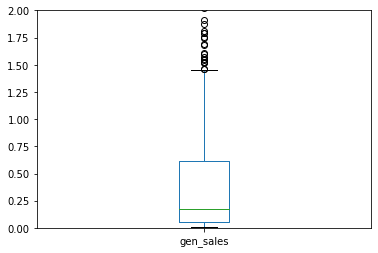

PS3


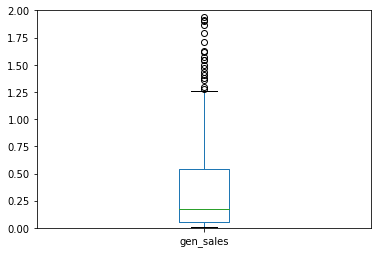

X360


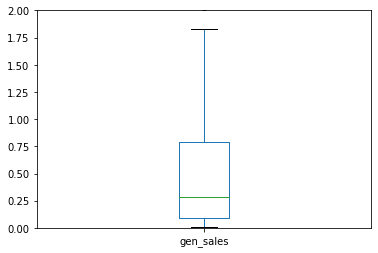

3DS


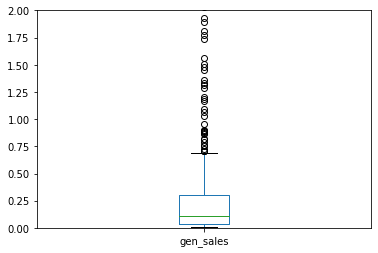

XOne


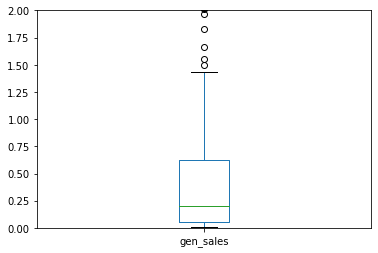

In [16]:
platform_max_current = data_current.groupby('platform')['gen_sales'].sum().reset_index().\
sort_values(by='gen_sales', ascending=False).head()['platform'].values
for platform in platform_max_current:
    print(platform)
    data_current.loc[data_current['platform']==platform, 'gen_sales'].plot(kind='box', ylim=(0,2))
    plt.show()

Данные по каждой платформе заметно скошенны вправо. То есть половина игр продавалась не очень хорошо. Остальная половина имеет большой разброс. У всех платформ есть игры, которые выделились на фоне остальных весьма успешными продажами. У всех платформ, кроме XOne, по 2 игры с глобальными продажами выше 10 миллионов копий. Самые продаваемые игры у X360.


<div>
    <font color="green"> Корреляционная таблица и диаграммы рассеяния продаж в зависимости от оценок критиков и пользователей для PS4. </font>
</div>

,critic_score,user_score,gen_sales
critic_score,1.000000,0.557654,0.405887
user_score,0.557654,1.000000,-0.031261
gen_sales,0.405887,-0.031261,1.000000


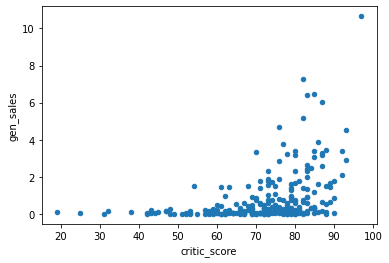

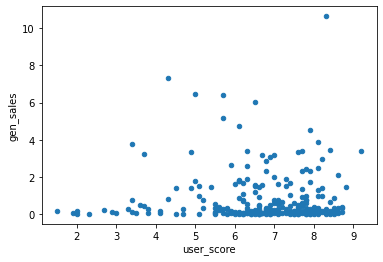

In [17]:
data_current.query('platform=="PS4"').plot.scatter(x='critic_score', y='gen_sales')
data_current.query('platform=="PS4"').plot.scatter(x='user_score', y='gen_sales')
data_current.query('platform=="PS4"').loc[:,['critic_score', 'user_score', 'gen_sales']].corr()

Для PS4 слабая линейная зависимость продаж от оценок критиков, линейной зависимости продаж от оценок пользователей нет. В основном оценки критиков в диапазоне от 60 до 90. Для малых продаж зависимости продаж от оценок критиков не видно. Большие продажи тяготеют к высоким оценкам критиков. Оценки пользователей меньше влияют на продажи, нежели оценки критиков, так как график зависимости продаж от оценок пользователей заметно более разбросанный, чем от оценок критиков. Оценки пользователей в основном в диапазоне от 6 до 9. 

<div>
    <font color="green">
        Корреляционные таблицы и диаграммы рассеяния продаж в зависимости от оценок критиков и пользователей для остальных популярных платформ в период с 2012 по 2016 года.
    </font>
</div>

PS3


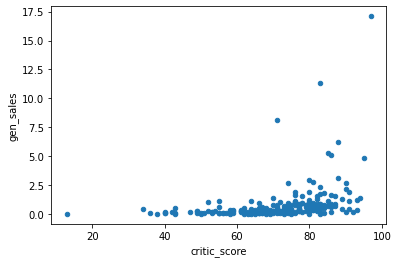

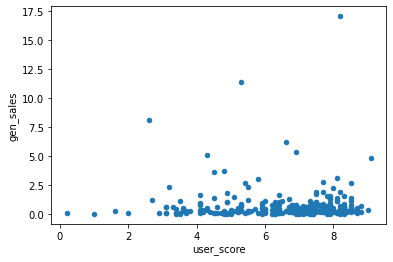

,critic_score,user_score,gen_sales
critic_score,1.000000,0.544510,0.337168
user_score,0.544510,1.000000,-0.006436
gen_sales,0.337168,-0.006436,1.000000


X360


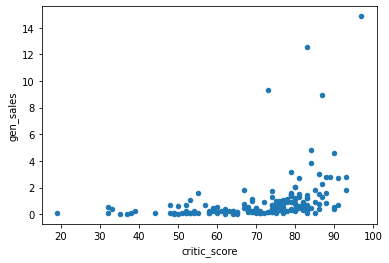

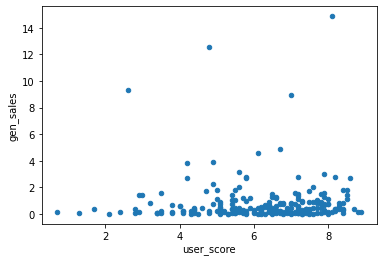

,critic_score,user_score,gen_sales
critic_score,1.000000,0.557352,0.360260
user_score,0.557352,1.000000,0.006563
gen_sales,0.360260,0.006563,1.000000


3DS


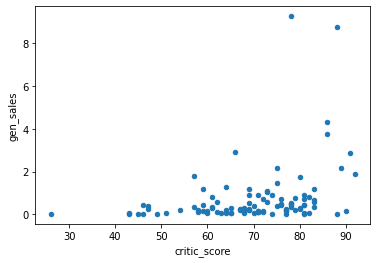

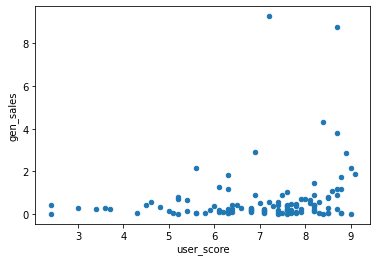

,critic_score,user_score,gen_sales
critic_score,1.000000,0.722762,0.320804
user_score,0.722762,1.000000,0.199239
gen_sales,0.320804,0.199239,1.000000


XOne


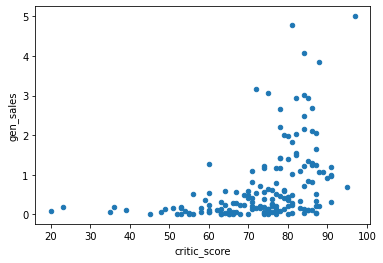

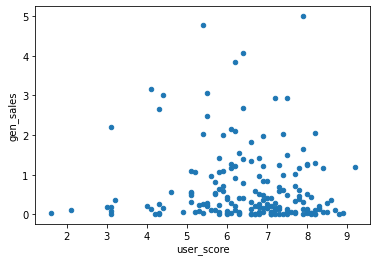

,critic_score,user_score,gen_sales
critic_score,1.000000,0.472462,0.417206
user_score,0.472462,1.000000,-0.068804
gen_sales,0.417206,-0.068804,1.000000


In [18]:
for platform in platform_max_current:
    if platform!='PS4':
        print(platform)
        data_current.query('platform==@platform').plot.scatter(x='critic_score', y='gen_sales')
        data_current.query('platform==@platform').plot.scatter(x='user_score', y='gen_sales')
        plt.show()
        display(data_current.query('platform==@platform').loc[:,['critic_score', 'user_score', 'gen_sales']].corr())

Для остальных платформ результаты анализа близки к результатам анализа по платформе PS4, кроме платформы 3DS, что возможно связано с меньшим объёмом данных этой платформы по сравнению с другими платформами.

<div>
    <font color="green">Распределение игр по жанрам за актуальный период.</font>
</div>

In [19]:
data_current.value_counts('genre')

genre
Action          1031
Role-Playing     370
Adventure        302
Sports           267
Shooter          235
Misc             192
Racing           114
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
dtype: int64

<div>
    <font color="green">
        Медианы продаж для каждого жанра.</font>
</div>

genre
Shooter         0.380
Sports          0.220
Platform        0.190
Role-Playing    0.135
Fighting        0.130
Racing          0.130
Misc            0.120
Action          0.110
Simulation      0.110
Strategy        0.070
Puzzle          0.040
Adventure       0.030
Name: gen_sales, dtype: float64

<AxesSubplot:>

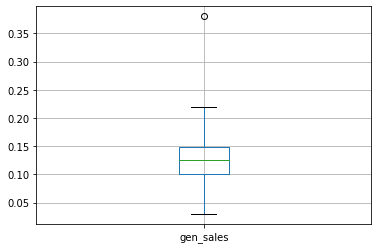

In [20]:
display(data_current.groupby('genre')['gen_sales'].median().sort_values(ascending=False))
data_current.groupby('genre')['gen_sales'].median().sort_values(ascending=False).reset_index().boxplot('gen_sales')

Жанры Shooter, Sports, Platform самые прибыльные жанры, при этом по числу игр они заметно уступают менее прибыльным жанрам, что может говорить о приоритете качества, а не колличества и о стабильности в качестве игр этих жанров. Жанр Shooter выделяется высокими продажами.

<div>
    <font color="green">Топ-5 платформ по продажам в Северной Америке, Европе и Японии.</font>
</div>

In [21]:
for name in ['na_sales', 'eu_sales', 'jp_sales']:
    display(data_current.groupby('platform')[name].sum().reset_index().sort_values(by=name, ascending=False).head().\
            reset_index(drop=True))
    print('Доля продаж топ-5 от всех продаж по региону',name[:2].upper(),'равна',  \
          data_current.groupby('platform')[name].sum().reset_index().sort_values(by=name, ascending=False).head()[name].sum()/\
    data_current[name].sum())

,platform,na_sales
0,X360,140.05
1,PS4,108.74
2,PS3,103.38
3,XOne,93.12
4,3DS,55.31


Доля продаж топ-5 от всех продаж по региону NA равна 0.847081916171718


,platform,eu_sales
0,PS4,141.09
1,PS3,106.85
2,X360,74.52
3,XOne,51.59
4,3DS,42.64


Доля продаж топ-5 от всех продаж по региону EU равна 0.8222792303897392


,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01


Доля продаж топ-5 от всех продаж по региону JP равна 0.8987953058469218


По каждому региону доли продаж платформ из топ-5 от продаж по всем платформам близки между собой и находятся в диапазоне от 82% до 90%.

<div>
    <font color="green">Топ-5 жанров по продажам в Северной Америке, Европе и Японии.</font>
</div>

In [22]:
for name in ['na_sales', 'eu_sales', 'jp_sales']:
    print(name[:2])
    display(data_current.groupby('genre')[name].median().sort_values(ascending=False).head())

na


genre
Shooter     0.20
Platform    0.09
Sports      0.08
Fighting    0.05
Racing      0.04
Name: na_sales, dtype: float64

eu


genre
Shooter       0.17
Racing        0.09
Platform      0.08
Sports        0.05
Simulation    0.03
Name: eu_sales, dtype: float64

jp


genre
Role-Playing    0.06
Fighting        0.03
Misc            0.02
Action          0.01
Adventure       0.01
Name: jp_sales, dtype: float64

В NA и EU в топ-5 4 из 5 жанров совпадают, Shooter самый популярный жанр в обоих регионах. Также близки медианы продаж. Видимо такое сходство связано с тем, что большинство игр производства англоязычных стран.
В JP по продажам лидирует жанр Role-Playing.  Продаж заметно меньше, чем в NA и EU. 


<div>
    <font color="green">Влияние рейтинга ESRB на продажи по регионам.</font>
</div>

In [23]:
v = data_current['rating'].value_counts().reset_index()
print(v)
for name in ['na_sales', 'eu_sales', 'jp_sales']:
    display(data_current.groupby('rating')[name].sum().reset_index())


     index  rating
0  unknown    1275
1        M     498
2        T     411
3        E     394
4     E10+     306


,rating,na_sales
0,E,114.37
1,E10+,75.70
2,M,231.57
3,T,66.02
4,unknown,103.31


,rating,eu_sales
0,E,113.02
1,E10+,55.37
2,M,193.96
3,T,52.90
4,unknown,91.50


,rating,jp_sales
0,E,28.33
1,E10+,8.19
2,M,21.20
3,T,26.02
4,unknown,108.84


В NA и в EU продажи в зависимости от рейтинга незначительно различаются между собой. 1/6 часть продаж приходится на игры без маркировки. В JP половина продаж приходится на игры с маркировкой.

<div>
    <font color="green">Проверка гипотезы, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.</font>
</div>

In [24]:
results = st.ttest_ind(data_current.loc[(data_current['platform']=='XOne') & (data_current['user_score'].notna()), 'user_score'],\
                      data_current.loc[(data_current['platform']=='PC') & (data_current['user_score'].notna()), 'user_score'])
alpha = .05
print(results.pvalue)
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


0.5112133814834332
Не получилось отвергнуть нулевую гипотезу


H_0:Среднее пользовательского рейтинга платформы XOne = среднему пользовательскому рейтингу платформы PC\
H_1:Среднее пользовательского рейтинга платформы XOne != среднему пользовательскому рейтингу платформы PC

<div>
    <font color="green">Проверка гипотезы, что средние пользовательские рейтинги жанров Action и Sports разные.</font>
</div>

In [25]:
results = st.ttest_ind(data_current.loc[(data_current['genre']=='Action') & (data_current['user_score'].notna()), 'user_score'],\
                      data_current.loc[(data_current['genre']=='Sports') & (data_current['user_score'].notna()), 'user_score'])
                      
alpha = .05
print(results.pvalue)
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

4.8045233804629176e-26
Отвергаем нулевую гипотезу


H_0:Среднее пользовательского рейтинга жанра Action = среднему пользовательскому рейтингу жанра Sports.\
H_1:Среднее пользовательского рейтинга жанра Action != среднему пользовательскому рейтингу жанра Sports.

<div>
    <font color="green">Вывод:</font>
</div>

Данные по частоте выпускаемых игр по годам скошенны влево, имеют отрицательную скошенность. Частота игр до 1990 года релиза хоть и мала, но эти данные в общем могут быть важны для исследования. Хотя в рамках данного исследования был найден актуальный период.\
\
Новые платформы появляются примерно каждые 5 лет. Хотя в 2010 году сильно прибыльных платформ не появилось.Платформы держаться на рынке около 10 лет.Актуальным периодом для исследования для прогноза на 2017 год выбран период с 2012 года.
В настоящий период по продажам лидирует PS4. DS полностью ушла с рынка. WiiU показывает некоторую стабильность, хоть и невысокую популярность, как и 3DS. В выделенный период появились PS4, XOne. Потенциально прибыльными можно выбрать PS4, XOne, WiiU, 3DS.\
 \
Самые продаваемые платформы по актуальному периоду: PS3, PS4, 3DS, XOne, X360. Данные по каждой из этих платформ заметно скошенны вправо. То есть половина игр продавалась не очень хорошо. Остальная половина имеет большой разброс. У всех платформ есть игры, которые выделились на фоне остальных весьма успешными продажами. У всех платформ, кроме XOne, по 2 игры с глобальными продажами выше 10 миллионов копий. Самые продаваемые игры у X360.\
\
Для PS4 слабая линейная зависимость продаж от оценок критиков, линейной зависимости продаж от оценок пользователей нет. В основном оценки критиков в диапазоне от 60 до 90. Для малых продаж зависимости продаж от оценок критиков не видно. Игры с самыми большими продажами  имеют высокие оценки критиков. Оценки пользователей меньше влияют на продажи, нежели оценки критиков, так как график зависимости продаж от оценок пользователей заметно более разбросанный, чем от оценок критиков. Оценки пользователей в основном в диапазоне от 6 до 9. 
Для остальных платформ результаты анализа близки к результатам анализа по платформе PS4, кроме платформы 3DS, что возможно связано с меньшим объёмом данных этой платформы по сравнению с другими платформами.\
\
Жанры Shooter, Sports, Platform самые прибыльные жанры, при этом по числу игр они заметно уступают менее прибыльным жанрам, что может говорить о приоритете качества, а не колличества и о стабильности в качестве игр этих жанров. Жанр Shooter выделяется высокими продажами.\
\
По каждому региону доли продаж платформ из топ-5 от продаж по всем платформам близки между собой и находятся в диапазоне от 82% до 90%. То есть платформы из топ-5 приносят около 85% от всей прибыли.\
\
В NA и EU в топ-5 4 из 5 жанров совпадают, Shooter самый популярный жанр в обоих регионах. Также близки медианы продаж. Возможно такое сходство связано с тем, что большинство игр производства англоязычных стран. В JP по продажам лидирует жанр Role-Playing. Продаж заметно меньше, чем в NA и EU.\
\
В NA и в EU продажи в зависимости от рейтинга ESRB незначительно различаются между собой. 1/6 часть продаж приходится на игры без маркировки. В JP половина продаж приходится на игры с маркировкой.\
\
Гипотезу о том, что среднее пользовательского рейтинга платформы XOne равно среднему пользовательскому рейтингу платформы PC не получилось отвергнуть. 
 \
 \
Отвергается гипотеза о том, что среднее пользовательского рейтинга жанра Action равно среднему пользовательскому рейтингу жанра Sports.

